# Predicting Boston Housing Prices with Deep Learning (MLP)

dataset: https://storage.googleapis.com/tensorflow/tf-keras-datasets/boston_housing.npz

In [2]:
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras import Sequential
from tensorflow.keras import layers
import matplotlib.pyplot as plt

## 1- Data preparation

In [3]:
(train_data, train_labels), (test_data, test_labels) = boston_housing.load_data()

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
train_data.shape

(404, 13)

In [5]:
train_data[0]

array([  1.23247,   0.     ,   8.14   ,   0.     ,   0.538  ,   6.142  ,
        91.7    ,   3.9769 ,   4.     , 307.     ,  21.     , 396.9    ,
        18.72   ])

In [6]:
train_labels[0]

np.float64(15.2)

In [7]:
mean = train_data.mean(axis=0)
mean

array([3.74511057e+00, 1.14801980e+01, 1.11044307e+01, 6.18811881e-02,
       5.57355941e-01, 6.26708168e+00, 6.90106436e+01, 3.74027079e+00,
       9.44059406e+00, 4.05898515e+02, 1.84759901e+01, 3.54783168e+02,
       1.27408168e+01])

In [8]:
std = train_data.std(axis=0)
std

array([9.22929073e+00, 2.37382770e+01, 6.80287253e+00, 2.40939633e-01,
       1.17147847e-01, 7.08908627e-01, 2.79060634e+01, 2.02770050e+00,
       8.68758849e+00, 1.66168506e+02, 2.19765689e+00, 9.39946015e+01,
       7.24556085e+00])

In [9]:
train_data = train_data - mean
train_data = train_data / std

In [10]:
train_data[0]

array([-0.27224633, -0.48361547, -0.43576161, -0.25683275, -0.1652266 ,
       -0.1764426 ,  0.81306188,  0.1166983 , -0.62624905, -0.59517003,
        1.14850044,  0.44807713,  0.8252202 ])

## 2- Model design

In [11]:
def build_model():
  model = Sequential([
      layers.Dense(64, activation="relu", input_shape=(13,)),
      layers.Dense(64, activation="relu"),
      layers.Dense(1)
      ])

  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model

In [12]:
model = build_model()
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,121 (20.00 KB)

 Trainable params: 5,121 (20.00 KB)

 Non-trainable params: 0 (0.00 B)

## 3- Training

In [13]:
history = model.fit(train_data, train_labels,
                    batch_size=16,
                    epochs=20,
                    validation_split=0.2)

Epoch 1/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 574.5713 - mae: 21.8705 - val_loss: 509.2105 - val_mae: 20.6291
Epoch 2/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 417.4403 - mae: 18.0795 - val_loss: 372.0249 - val_mae: 17.1232
Epoch 3/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 297.7487 - mae: 15.0065 - val_loss: 227.3910 - val_mae: 12.6778
Epoch 4/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 144.4544 - mae: 9.8466 - val_loss: 117.0574 - val_mae: 8.2483
Epoch 5/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 83.4730 - mae: 7.0306 - val_loss: 65.4442 - val_mae: 5.9416
Epoch 6/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 47.1146 - mae: 5.1090 - val_loss: 44.3847 - val_mae: 4.7966
Epoch 7/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 33.7446 - mae: 4.3370 - val_loss: 32.0481 - val_mae: 4.2664
Epoch 8/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 26.8316 - mae: 3.7459 - val_loss: 26.6115 - val_mae: 3.8109
Epoch 9/20
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 

## 4- Evaluation

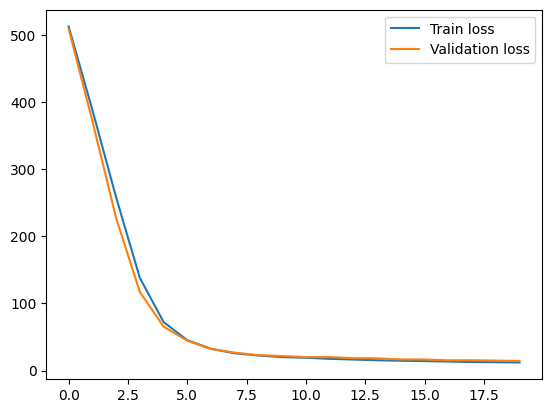

In [14]:
losses = history.history['loss']
val_losses = history.history['val_loss']

plt.plot(losses, label='Train loss')
plt.plot(val_losses, label='Validation loss')
plt.legend()
plt.show()

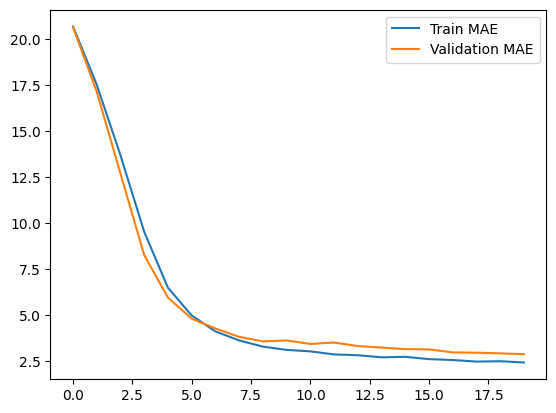

In [15]:
maes = history.history['mae']
val_maes = history.history['val_mae']

plt.plot(maes, label='Train MAE')
plt.plot(val_maes, label='Validation MAE')
plt.legend()
plt.show()

In [16]:
test_data -= mean
test_data /= std

In [17]:
model.evaluate(test_data, test_labels)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 17.2762 - mae: 3.0302 


[21.491474151611328, 3.229219675064087]